In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print("Image data shape is:", digits.data.shape)

print("Label data shape is:", digits.target.shape)

Image data shape is: (1797, 64)
Label data shape is: (1797,)


In [3]:
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

In [4]:
digits.target[7]
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
x=digits.data
y=digits.target

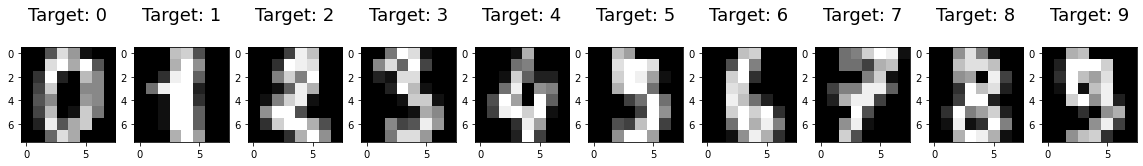

In [6]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Target: %i\n' % label, fontsize = 18)

In [7]:
from sklearn.model_selection import train_test_split 

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(C = 5, solver='saga',random_state=12, max_iter=2500, tol=0.0001, multi_class='auto')

In [10]:
clf.fit(xtrain, ytrain)

LogisticRegression(C=5, max_iter=2500, random_state=12, solver='saga')

In [11]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(xtest[0].reshape(1,-1))

array([2])

In [12]:
clf.predict(xtest[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [13]:
predt = clf.predict(xtest)

In [14]:
# Here we have to manually get the prediction and then run the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predt))


0.9555555555555556


In [15]:
# Here the prediction step is auto taken care of.
score = clf.score(xtest,ytest)
print(score)

0.9555555555555556


In [16]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.95      0.97        44
           3       0.93      0.96      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,predt)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [18]:
import seaborn as sns

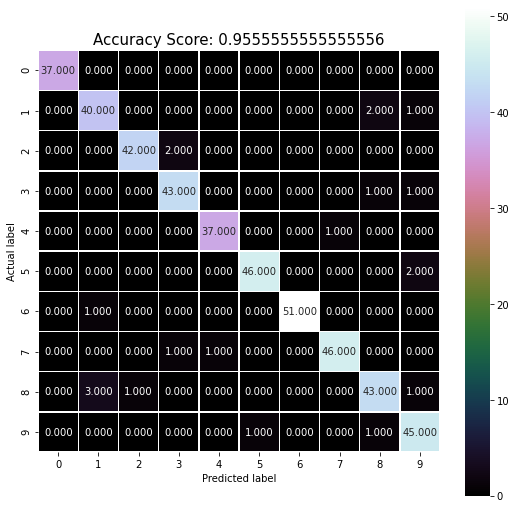

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'cubehelix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();